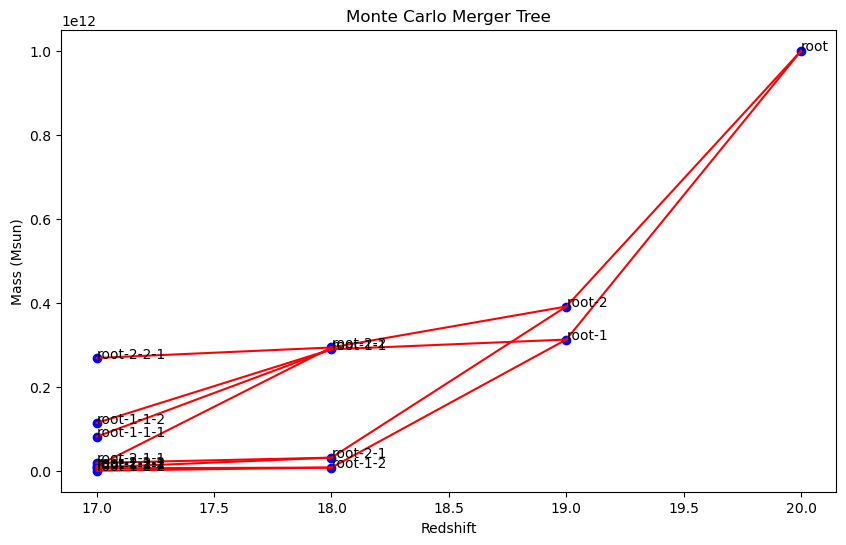

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class Halo:
    def __init__(self, id, mass, redshift):
        self.id = id
        self.mass = mass
        self.redshift = redshift
        self.progenitors = []

            
def generate_merger_tree(halo, num_generations, max_progenitors, mass, redshift, dt):
    if num_generations == 0:
        return
    
    remaining_mass = halo.mass

    for i in range(np.random.randint(2, max_progenitors + 1)):
        progenitor_id = f"{halo.id}-{i+1}"
        M = np.random.uniform(0, remaining_mass) 
        progenitor_mass = M
        remaining_mass -= M
        progenitor_redshift = (halo.redshift - dt)

        progenitor_halo = Halo(progenitor_id, progenitor_mass, progenitor_redshift)
        halo.progenitors.append(progenitor_halo)

        generate_merger_tree(progenitor_halo, num_generations - 1, max_progenitors, mass, redshift, dt)
        

def plot_merger_tree(halo, depth):
    plt.scatter(halo.redshift, halo.mass, color='b')
    plt.text(halo.redshift, halo.mass, halo.id)

    for progenitor in halo.progenitors:
        plt.plot([halo.redshift, progenitor.redshift], [halo.mass, progenitor.mass], color='r')
        plot_merger_tree(progenitor, depth + 1)
        
def visualize_merger_tree(root_halo):
    plt.figure(figsize=(10, 6))
    plot_merger_tree(root_halo, 0)
    plt.title("Monte Carlo Merger Tree")
    plt.xlabel("Redshift")
    plt.ylabel("Mass (Msun)")
    plt.show()


if __name__ == "__main__":
    root_halo = Halo("root", 1e12, 20)
    generate_merger_tree(root_halo, num_generations=3, max_progenitors=2, mass=1e12, redshift=20, dt=1)
    visualize_merger_tree(root_halo)
